# Maps

Import utilities and define volcano coordinates.

In [1]:
import obspy
import matplotlib.pyplot as plt
from vdapseisutils import Map, CrossSection, TimeSeries, VolcanoFigure

radial_extent = 10  # kilometers
maxdepth = 20  # kilometers

hood = dict()
hood["coords"] = [45.374, -121.695, 3426]
hood["name"] = "Hood/Wy'East"

msh = dict()
# msh["coords"] = [46.1914, -122.1956]  # South Rim summit
msh["coords"] = [46.199004, -122.189071]  # Dome
msh["name"] = "St. Helens"

rainier = dict()
rainier["coords"] = [46.853, -121.76, 4392]

kilauea = dict()
kilauea["coords"] = [19.421, -155.287, 1222]
kilauea["map_extent"] = [-155.500, -154.800, 19.200, 19.500]

mauna_kea = dict()
mauna_kea["coords"] = [19.82, -155.47, 1222]
mauna_kea["azimuth"] = 280

pavlof = dict()
pavlof["coords"] = [55.417, -161.894, 2439]

crater_lake = dict()
crater_lake["coords"] = [42.942, -122.107]

banua_wuhu = dict()
banua_wuhu["coords"] = [3.138, 125.491, -5]
banua_wuhu["map_extent"] = [124.085433, 128.538886, 0.966248, 4.532257]
banua_wuhu["points"] = [
    [(3.424226, 125.534186), "Sangihe Island"],
    [(2.798295, 125.419080), "Sitaro Island"],
    [(1.602387, 125.074145), "Sulawesi"],
    [(2.035740, 127.862160), "North Halmahera"],
    [(1.406734, 127.593366), "West Halmahera"],
    [(0.825030, 127.318614), "Ternate"],
]

gamalama = dict({
    "name": "Gamalama",
    "coords": [0.81, 127.3322],
})

ruang = dict({
    "name": "Ruang",
    "coords": [2.3, 125.37],
})

st_helens = dict()
st_helens["coords"] = [46.1914, -122.1956, 2549]
st_helens["name"] = "Mount St. Helens"


Load catalogs from file...

In [2]:
import os
os.getcwd()

'/Users/jwellik/PYTHON/PKG/vdapseisutils/gallery'

In [3]:
print("Loading catalogs from file...")
cat_kilauea = obspy.read_events("../data/catalog_kilauea_eruption.xml", format="QUAKEML")
cat_hood_msas = obspy.read_events("../data/catalog_hood_msas.xml", format="QUAKEML")
cat_kiholo_msas = obspy.read_events("../data/catalog_kiholo_bay_msas.xml", format="QUAKEML")
cat_tanaga_unkn = obspy.read_events("../data/catalog_tanaga_unknown.xml", format="QUAKEML")
cat_msh1980 = obspy.read_events("../data/catalog_msh1980_eruption.xml", format="QUAKEML")
print("Done.")

Loading catalogs from file...
Done.


## Map

### Mount Rainier

>> Raininer
::: MAP AXES :::
{'origin': (46.853, -121.76), 'radial_extent_km': 15.0, 'map_extent': [np.float64(-121.95668389712597), np.float64(-121.56331610287405), np.float64(46.71806745473829), np.float64(46.98792934973398)]}



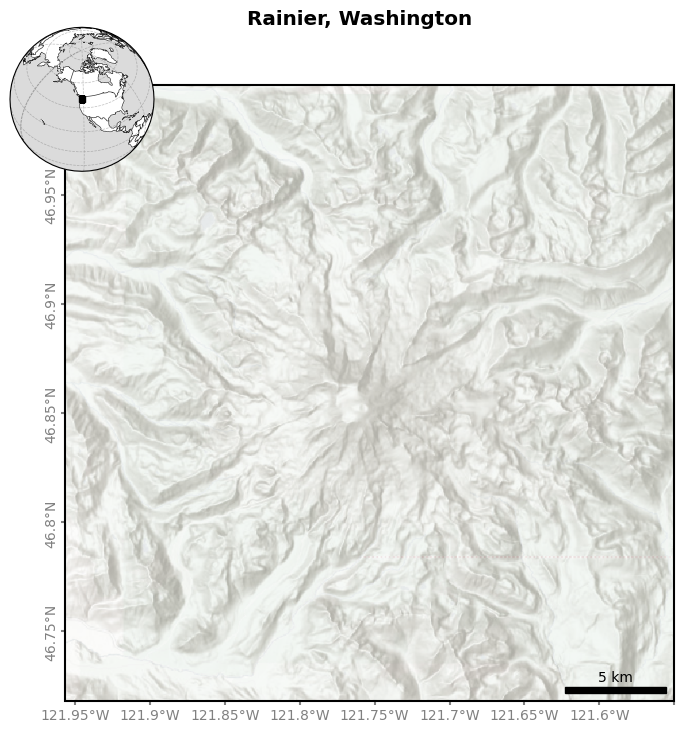

In [4]:
print(">> Raininer")
fig = Map(origin=(rainier["coords"][0], rainier["coords"][1]), radial_extent_km=15.0, figsize=(8, 8))
fig.add_terrain()
# fig.add_google_terrain()
fig.add_scalebar()
fig.add_world_location_map(size=0.18)
fig.set_title("Rainier, Washington")
fig.info()

### Kīlauea

In [5]:
from obspy.clients.fdsn.client import Client
client = Client("IRIS")
[-155.500, -154.800, 19.200, 19.500]
inv = client.get_stations(network="HV", minlatitude=kilauea["map_extent"][2], maxlatitude=kilauea["map_extent"][3], minlongitude=kilauea["map_extent"][0], maxlongitude=kilauea["map_extent"][1])
# print(inv)

ArcGIS Terrain Tiles:
  Zoom level: 10
  SSL verification: False
  Terrain URL: https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer/tile/10/{y}/{x}
  Overlay URL: https://tiles.basemaps.cartocdn.com/light_nolabels/10/{x}/{y}.png
::: MAP AXES :::
{'origin': None, 'radial_extent_km': None, 'map_extent': [-155.5, -154.8, 19.2, 19.5]}



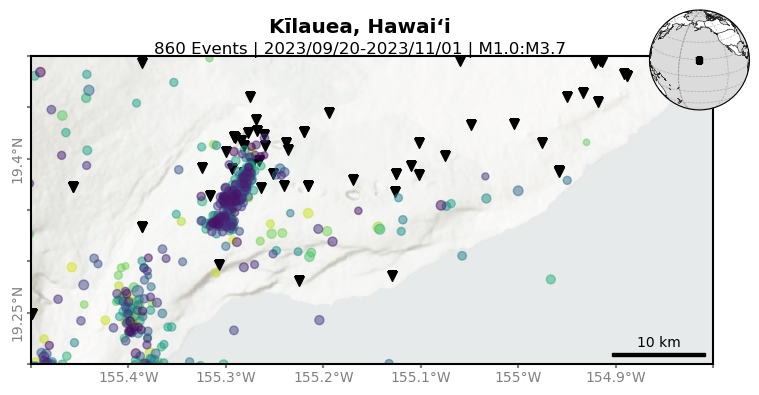

In [6]:
fig = Map(map_extent=kilauea["map_extent"], figsize=(10, 4))
fig.add_terrain(verbose=True)
# fig.add_google_terrain(verbose=True)
fig.add_scalebar()
fig.plot_inventory(inv)
fig.plot_catalog(cat_kilauea)
fig.add_world_location_map(position="upper right", size=0.25)
fig.set_title("Kīlauea, Hawaiʻi")
fig.set_catalog_subtitle(cat_kilauea)
fig.info()
# fig.savefig("./output/Mapping_tutorial/Map_Kilauea.png")

### Sulawesi, Indonesia

#### Regional map

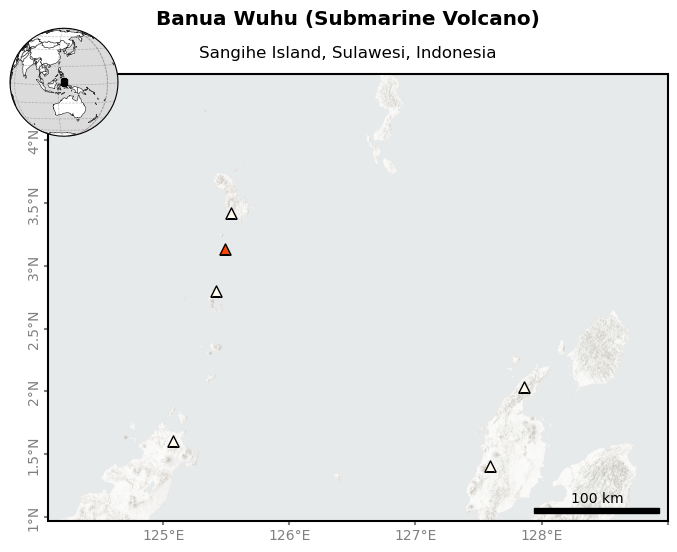

In [7]:
# Regional Map
volc = banua_wuhu
fig = plt.figure(figsize=(16/2, 12/2), dpi=100)  # width, height
spec = fig.add_gridspec(8, 8)  # rows, columns (height, width)
fig_m = fig.add_subfigure(spec[0:8, 0:8], zorder=0)  #
fig_m = Map(map_extent=volc["map_extent"], fig=fig_m)
fig_m.add_terrain()
fig_m.add_scalebar()
fig_m.add_world_location_map()
fig_m.set_title("Banua Wuhu (Submarine Volcano)")
fig_m.set_subtitle("Sangihe Island, Sulawesi, Indonesia")

fig_m.plot_volcano(volc["coords"][0], volc["coords"][1], "^r")  # Banua Wuhu
[fig_m.plot_peak(p[0][0], p[0][1], "^k") for p in volc["points"]]  # Other volcanoes in the region
# plt.savefig("./output/Mapping_tutorial/Bathymetry_BanuaWuhu_regional.png")
# plt.show()

#### Banua Wuhu - submarine volcano

Google Terrain Tiles:
  Zoom level: 11
  SSL verification: False
  URL template: https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}
Consider using the same projection for both axes and tiles


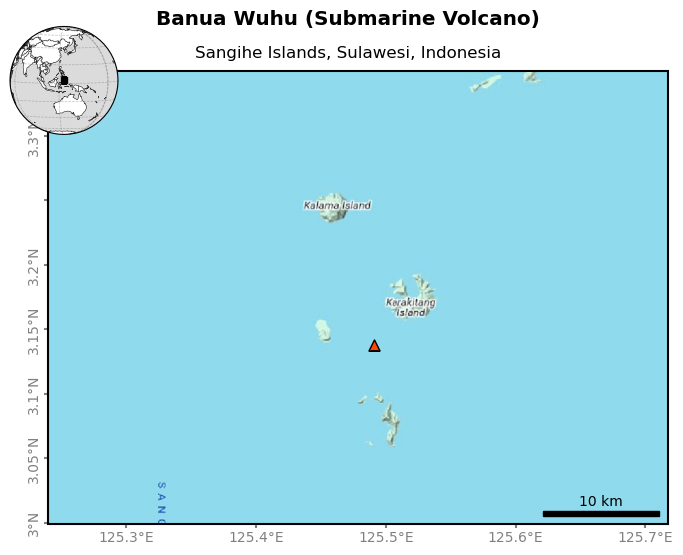

In [8]:
volc = banua_wuhu
fig = plt.figure(figsize=(16/2, 12/2), dpi=100)  # width, height
spec = fig.add_gridspec(8, 8)  # rows, columns (height, width)
fig_m = fig.add_subfigure(spec[0:8, 0:8])  #
fig_m = Map(map_extent=[125.239416, 125.717357, 2.998957, 3.344241], fig=fig_m)
fig_m.add_google_terrain(verbose=True, zoom=11)
fig_m.add_scalebar(scale_length_km=10)
fig_m.plot_volcano(volc["coords"][0], volc["coords"][1], "^r")
fig_m.add_world_location_map()
fig_m.set_titles("Banua Wuhu (Submarine Volcano)", "Sangihe Islands, Sulawesi, Indonesia")
# plt.savefig("./output/Mapping_tutorial/Bathymetry_BanuaWuhu.png")
# plt.show()

## VolcanoFigure

### Mt Hood/Wy'East

In [9]:
from obspy.clients.fdsn.client import Client
from obspy.geodetics import kilometers2degrees as km2d
client = Client("IRIS")
inv = client.get_stations(network="CC,UW", latitude=hood["coords"][0], longitude=hood["coords"][1], maxradius=km2d(radial_extent))

In [10]:
volc = hood
cat = cat_hood_msas

fig = VolcanoFigure(figsize=(8,8), origin=(volc["coords"][0], volc["coords"][1]), depth_extent=(-5, 4), radial_extent_km=5.0)
fig.add_terrain(verbose=True)
fig.plot_inventory(inv, c='w', edgecolors='k')
fig.plot_catalog(cat, s="magnitude")
fig.title("Mount Hood / Wy'East, Oregon")
fig.catalog_subtitle(cat_hood_msas)
fig.magnitude_legend(cat)
fig.reftext("USGS - Cascades Volcano Observatory")
fig.savefig("./output/Mapping_tutorial/VolcanoFigure_Hood.png")

ArcGIS Terrain Tiles:
  Zoom level: 15
  SSL verification: False
  Terrain URL: https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer/tile/15/{y}/{x}
  Overlay URL: https://tiles.basemaps.cartocdn.com/light_nolabels/15/{x}/{y}.png


### Mount St. Helens

In [11]:
volc = msh
cat = cat_msh1980

fig = VolcanoFigure(figsize=(9,9), origin=(volc["coords"][0], volc["coords"][1]), depth_extent=(-5, 4), radial_extent_km=0.75)
fig.add_terrain(verbose=True)
fig.plot_catalog(cat, s="magnitude")
fig.title("Mount St Helens, Washington")
fig.subtitle("1980 PNSN-located Earthquakes")
# fig.catalog_subtitle(cat)
# fig.magnitude_legend(cat)
fig.reftext("USGS - Cascades Volcano Observatory")
fig.savefig("./output/Mapping_tutorial/VolcanoFigure_MSH.png")

ArcGIS Terrain Tiles:
  Zoom level: 15
  SSL verification: False
  Terrain URL: https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer/tile/15/{y}/{x}
  Overlay URL: https://tiles.basemaps.cartocdn.com/light_nolabels/15/{x}/{y}.png


### Ruang

In [12]:
volc = ruang
fig = VolcanoFigure(figsize=(8,8), origin=(volc["coords"][0], volc["coords"][1]), depth_extent=(-5, 3), radial_extent_km=6.0,
                     xs1={'azimuth': 270-45}, xs2={'azimuth': 360-45})
fig.add_terrain(verbose=True, ssl_verify=False)
fig.title("Ruang, North Sulawesi, Indonesia")
fig.reftext("Center for Volcanology and Geological Hazard Mitigation")
fig.savefig("./output/Mapping_tutorial/VolcanoFigure_Ruang.png")

ArcGIS Terrain Tiles:
  Zoom level: 13
  SSL verification: False
  Terrain URL: https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer/tile/13/{y}/{x}
  Overlay URL: https://tiles.basemaps.cartocdn.com/light_nolabels/13/{x}/{y}.png
